# Import library

In [1]:
import pandas as pd
import seaborn as sns

import os

# Create functions to prepare results

In [2]:
eval_metrics_dir = '../result/eval_metrics/'

col_names = {
    'loan_approval_prediction': ['Refused', 'Approved'],
    'review_priority_prediction': ['Low-Priority', 'High-Priority']
}

def read_result_from_csv(task_name, suffix):
    df = pd.read_csv(os.path.join(eval_metrics_dir, '{}_{}.csv'.format(task_name, suffix)))

    if 'each_class' in suffix:
        df['class'] = df['class'].str.replace('0.0','0')
        df['class'] = df['class'].str.replace('1.0','1')

        df['class'] = df['class'].str.replace('0', col_names[task_name][0])
        df['class'] = df['class'].str.replace('1',col_names[task_name][1])

    return df

def prepare_df_for_plotting(task_name):
    metrics_each_class_from_models = read_result_from_csv(task_name, 'result_each_class')
    metrics_all_classes_from_models = read_result_from_csv(task_name, 'result_all_classes')
    metrics_each_class_from_baselines = read_result_from_csv(task_name, 'each_class_baseline')
    metrics_all_classes_from_baselines = read_result_from_csv(task_name, 'all_classes_baseline')

    
    metrics_each_class_df = pd.concat([metrics_each_class_from_models, metrics_each_class_from_baselines])

    metrics_all_classes_df = pd.concat([metrics_all_classes_from_models, metrics_all_classes_from_baselines])

    melt_metrics_each_class_df = pd.melt(metrics_each_class_df, value_vars=['precision','recall','f1-score'], id_vars=['model', 'data-imbalanced-handling', 'class'])

    melt_metrics_all_classes_df = pd.melt(metrics_all_classes_df, value_vars=['AUC', 'MCC'], id_vars=['model', 'data-imbalanced-handling'])

    return melt_metrics_each_class_df, melt_metrics_all_classes_df


# Results for loan application status prediction

In [86]:
result_each_class, result_all_classes = prepare_df_for_plotting('loan_approval_prediction')

/home/oathaha/.conda/envs/env_oat/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


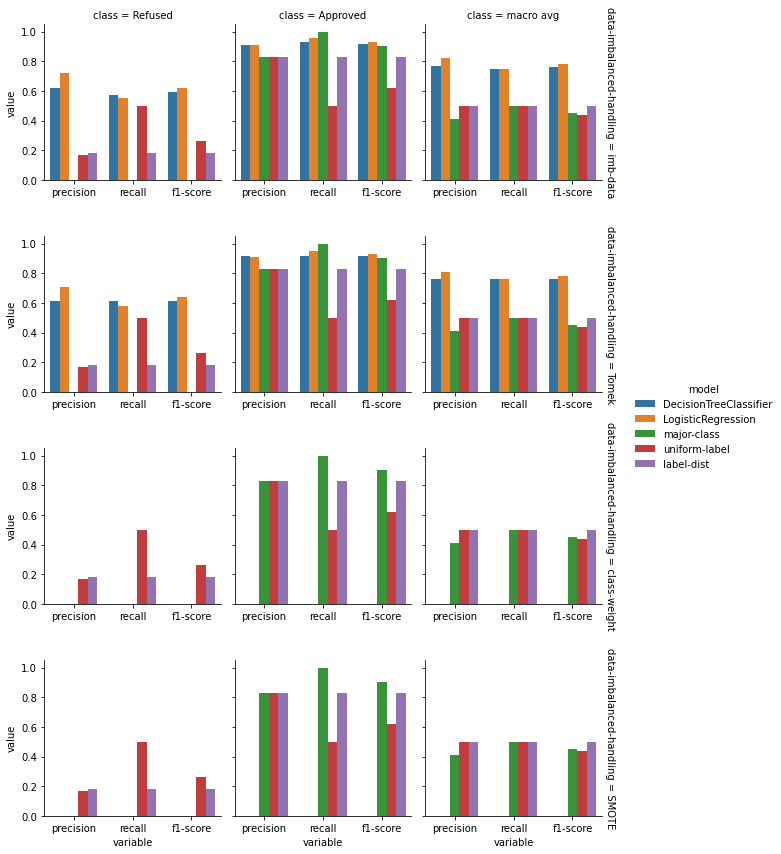

In [87]:
g = sns.catplot(
    data=result_each_class, x="variable", y="value", row='data-imbalanced-handling', col="class", hue = 'model', kind="bar", height=3, margin_titles=True, sharex=False
)

/home/oathaha/.conda/envs/env_oat/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


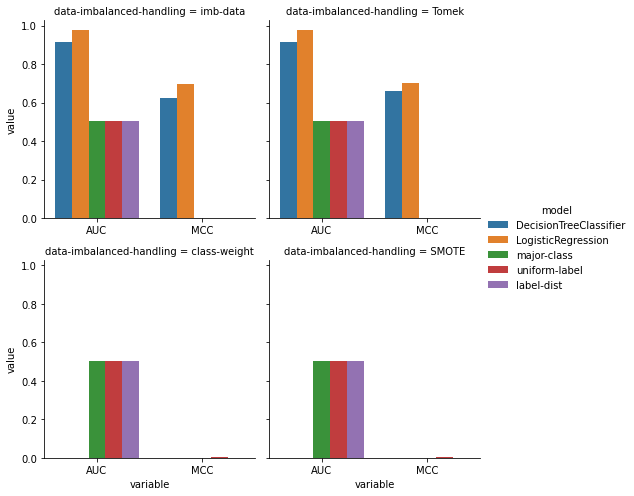

In [88]:
g = sns.catplot(
    data=melt_metrics_all_classes_df, x="variable", y="value", col='data-imbalanced-handling', hue = 'model', kind="bar", height=3.5, margin_titles=True, sharex=False, col_wrap=2
)

# Results for review priority of loan application prediction

In [3]:
result_each_class, result_all_classes = prepare_df_for_plotting('review_priority_prediction')

/home/oathaha/.conda/envs/env_oat/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


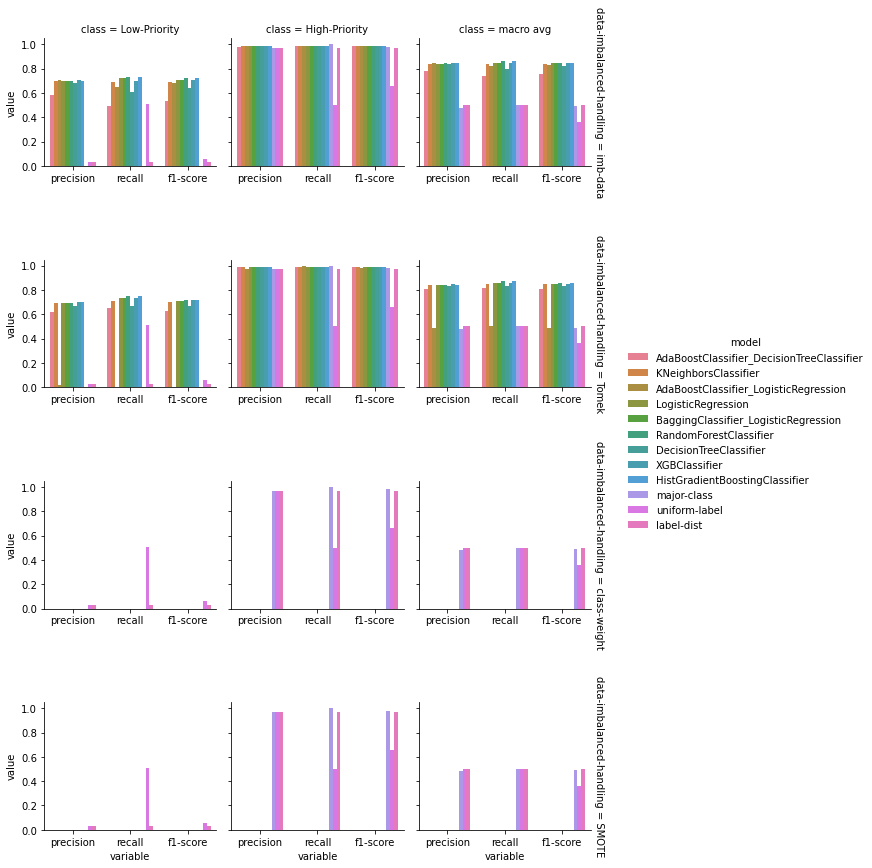

In [4]:
g = sns.catplot(
    data=result_each_class, x="variable", y="value", row='data-imbalanced-handling', col="class", hue = 'model', kind="bar", height=3, margin_titles=True, sharex=False
)

/home/oathaha/.conda/envs/env_oat/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


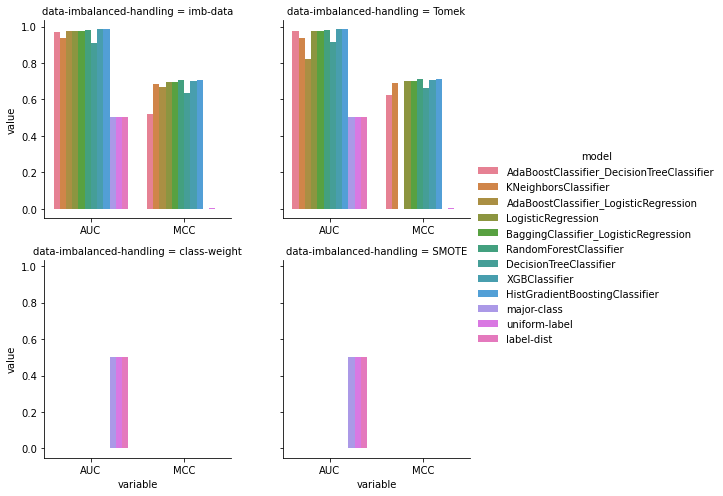

In [6]:
g = sns.catplot(
    data=result_all_classes, x="variable", y="value", col='data-imbalanced-handling', hue = 'model', kind="bar", height=3.5, margin_titles=True, sharex=False, col_wrap=2
)